## 필요한 라이브러리들

In [18]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

## 케라스 모델을 만드는 여러 방법

### 1. Sequential model

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.weights  #가중치는 입력값이 와야 들어오기 때문에 지금은 없음

[]

In [5]:
model.build(input_shape=(None, 3)) #모델은 크기가 (3,) 인 샘플을 기대, 배치 크기는 None 이므로 어떤 크기도 가능
model.weights #가중치 다시 확인

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/dense_1/bias>]

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model = keras.Sequential(name = "my_example_model")
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.build(input_shape=(None, 3)) 
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model = keras.Sequential(name = "my_example_model2")
model.add(keras.Input(shape = (3,)))  #이렇게 미리 인풋을 지정해주면 build 없이 바로 출력 가능 (build에서 인풋을 넣어주기 때문)
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "my_example_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

### 2. 함수형 API

- 비선형적인 구조를 가진 모델을 만들 때 Sequential()은 어려울 수 있음. 
- 다중 입력, 다중 출력일 때 유용함

In [15]:
#심볼릭 텐서 => 실제 데이터를 가지고 있진 않지만, 모델이 보게 될 텐서의 사양을 미리 인코딩
inputs = keras.Input(shape=(3,), name = "my_input")
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs = inputs, outputs=outputs, name = 'functional_1')

In [14]:
print(inputs.shape, inputs.dtype)

(None, 3) float32


In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## 진짜 실습해보기!

In [17]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size,), name = "title")
text_body= keras.Input(shape = (vocabulary_size, ), name = "text_body")
tags = keras.Input(shape = (num_tags, ), name = "tags")

features = layers.Concatenate()([title, text_body, tags]) #입력 특성을 하나의 텐서로 연결
features = layers.Dense(64, activation='relu')(features) #입력 특성을 더 풍부한 표현으로 만들기

priority = layers.Dense(1, activation='sigmoid', name = 'priority')(features)
department = layers.Dense(num_departments, activation='softmax', name = 'department')(features)
model = keras.Model(inputs = [title, text_body, tags], outputs = [priority, department])

In [19]:
#이 모델을 이제 훈련해보자!!

num_samples = 1280

title_data = np.random.randint(0,2,size = (num_samples, vocabulary_size)) #0에서 2사이의 임의의 정수 생성. 즉 0 또는 1값
text_body_data = np.random.randint(0,2,size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples, num_tags))

priority_data = np.random.random(size = (num_samples, 1))
department_data = np.random.random(size = (num_samples, num_departments))

model.compile(optimizer="rmsprop", loss = ['mean_squared_error', 'categorical_crossentropy'], metrics = [['mean_absolute_error'],['accuracy']])
model.fit([title_data, text_body_data, tags_data],[priority_data, department_data], epochs = 1)
model.evaluate([title_data, text_body_data, tags_data],[priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])  # model output이 위에서 설정할 때 두 개였음

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.2565 - loss: 37.1046 - priority_mean_absolute_error: 0.4817
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2368 - loss: 23.6710 - priority_mean_absolute_error: 0.5007 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


그러나 이런 형식은 입력 순서에 신경 써야 함. 예를 들어 loss 함수는 mean_squared_error는 prioirty, deparment는 categorical_crossentropy
- 미리 딕셔너리로 전달하는 방법 사용


In [20]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2603 - loss: 46.8654 - priority_mean_absolute_error: 0.5007
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.2292 - loss: 55.4968 - priority_mean_absolute_error: 0.5007 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


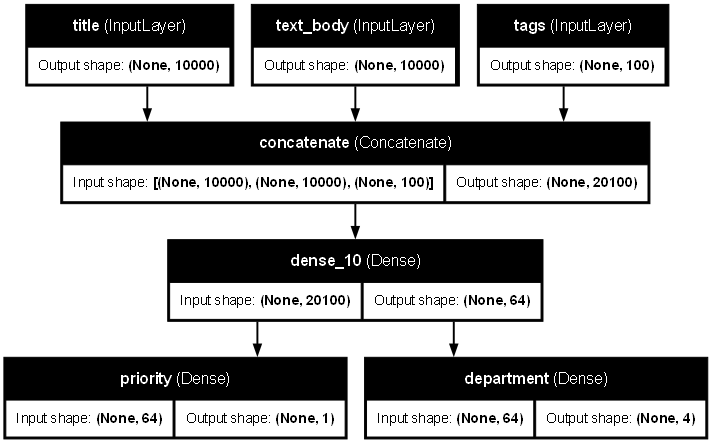

In [25]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True, show_layer_names=True, dpi=70, rankdir='TB')

- 위에도 언급했지만, shape 에서 (None)은 배치 크기가 자유롭다는 뜻이다.
- 이렇게 show_shapes = True를 하면 나중에 디버깅하기가 편하다. 

In [26]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [33]:
print("Input:", model.layers[3].input)
print("Output:", model.layers[3].output)#concat 층 

Input: [<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>, <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>, <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]
Output: <KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_14>


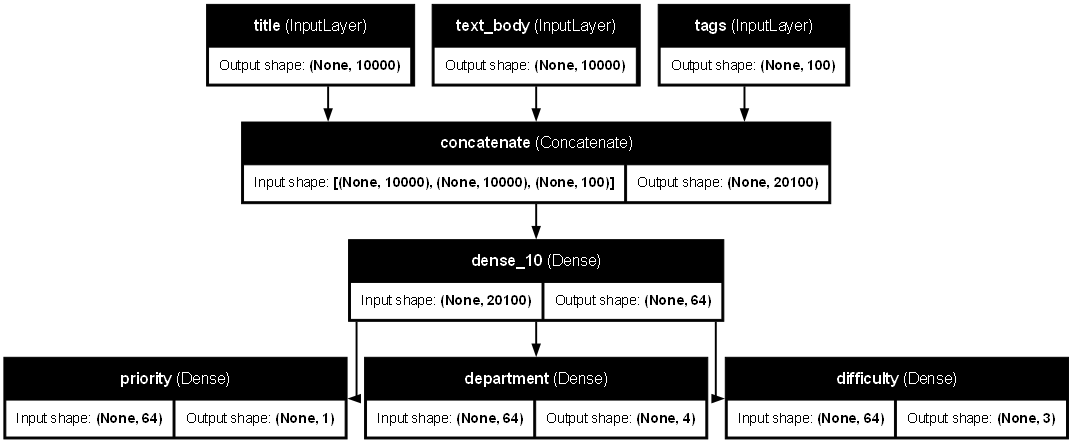

In [38]:
# 중간층의 모델 재사용해서 새로운 모델 만들기

features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name = "difficulty")(features)
new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty]
)

keras.utils.plot_model(new_model, "ticket_classifier_new.png", show_shapes=True, show_layer_names=True, dpi=70, rankdir='TB')

### 3. 모델 서브클래싱

- __init__ 에서 모델이 사용할 층을 정의
- call() 에서 앞서 만든 층을 사용해 모델의 정방향 패스를 정의
- 서브클래스의 객체를 만들고 데이터와 함께 호출해 가중치 만들기

In [46]:
class CustomoerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__() #부모 클래스의 생성자 호출
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')
    
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs['tags']
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [47]:
model = CustomoerTicketModel(num_departments=4)
priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [49]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2468 - loss: 37.1252 - mean_absolute_error: 0.4849
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2768 - loss: 21.9616 - mean_absolute_error: 0.5007 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## 내장된 훈련 루프와 평가 루프 사용하기

In [50]:
from tensorflow.keras.datasets import mnist
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs= inputs, outputs=outputs)
    return model


In [52]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32")/255  #훈련 이미지는 60000개, 테스트는 10000개, 픽셀 값은 255로 나눠서 정규화
test_images = test_images.reshape((10000, 28*28)).astype("float32")/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs = 3, validation_data = (val_images, val_labels))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8627 - loss: 0.4533 - val_accuracy: 0.9579 - val_loss: 0.1475
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9525 - loss: 0.1600 - val_accuracy: 0.9651 - val_loss: 0.1312
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9621 - loss: 0.1304 - val_accuracy: 0.9730 - val_loss: 0.1024


In [53]:
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1206
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## 커스터마이징하기 - 사용자 정의 지표 만들기

In [54]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)  #name은 지표의 이름, 기본값은 rmse
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros") #상태변수. 모델이 학습, 평가에서 값을 저장하고 업뎃. 각 에폭이나 평가 시작 시 변수 상태를 초기로 돌림
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32") #상태변수. 지표 계산에 필요함

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)  #self.mse_sum에  현재 배치의 mse를 더함
        num_samples = tf.shape(y_pred)[0] #배치의 수
        self.total_samples.assign_add(num_samples) #total_samples에 현재 배치의 num_samples 더함 

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)  #초기화
        self.total_samples.assign(0)  #초기화

In [55]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8687 - loss: 0.4438 - rmse: 0.4363 - val_accuracy: 0.9573 - val_loss: 0.1461 - val_rmse: 0.2521
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9515 - loss: 0.1712 - rmse: 0.2718 - val_accuracy: 0.9667 - val_loss: 0.1148 - val_rmse: 0.2233
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9633 - loss: 0.1268 - rmse: 0.2373 - val_accuracy: 0.9741 - val_loss: 0.0944 - val_rmse: 0.1993
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1038 - rmse: 0.2123


## 커스터마이징하기 - 콜백 사용하기  

**콜백이란?**  
- 모델 학습 과정 중 특정 시점에서 사용자가 정의한 작업을 수행할 수 있게 해 줌.
- 학습 과정 모니터링에 유용!
- 모델 체크포인트 (학습 도중 특정 조건에서 모델 저장, 혹은 가장 좋은 성능의 모델 저장)
- 조기 종료 (모델의 성능이 더이상 개선되지 않을 때)
- 학습률 스케줄링 (학습률을 동적으로 조정)
- 텐서보드 시각화
- 사용자 정의 작업 (에폭 끝에 모델의 중간 출력을 시각화하거나 경고를 보내거나)

In [58]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = "checkpoint_path.keras",
        monitor = "val_loss",
        save_best_only = True
    )
]  #두 번의 에폭 동안 정확도가 향상되지 않으면 훈련을 조기 종료, val_loss가 좋아지지 않으면 모델 파일을 덮어쓰지 않고 좋은 거만 저장

model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, callbacks = callbacks_list, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8632 - loss: 0.4507 - val_accuracy: 0.9598 - val_loss: 0.1475
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9511 - loss: 0.1647 - val_accuracy: 0.9680 - val_loss: 0.1201
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9628 - loss: 0.1320 - val_accuracy: 0.9683 - val_loss: 0.1160
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9691 - loss: 0.1100 - val_accuracy: 0.9748 - val_loss: 0.0976
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9725 - loss: 0.0982 - val_accuracy: 0.9748 - val_loss: 0.1014
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9731 - loss: 0.0940 - val_accuracy: 0.9776 - val_loss: 0.0933
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0819 - val_accuracy: 0.9791 - val_loss: 0.0900
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9788 - loss: 0.0697 - 

In [61]:
model = keras.models.load_model("checkpoint_path.keras")
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

In [63]:
# 손실 그래프 만들어보기

from matplotlib import pyplot as plt 

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label = "Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []
        

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.4487 - val_accuracy: 0.9565 - val_loss: 0.1486
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9498 - loss: 0.1676 - val_accuracy: 0.9686 - val_loss: 0.1136
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9630 - loss: 0.1294 - val_accuracy: 0.9711 - val_loss: 0.1044
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9691 - loss: 0.1097 - val_accuracy: 0.9742 - val_loss: 0.0953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9713 - loss: 0.1054 - val_accuracy: 0.9764 - val_loss: 0.0974
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0973 - val_accuracy: 0.9779 - val_loss: 0.0897
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9773 - loss: 0.0834 - val_accuracy: 0.9771 - val_loss: 0.0969
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9772 - loss: 0.0846 - 

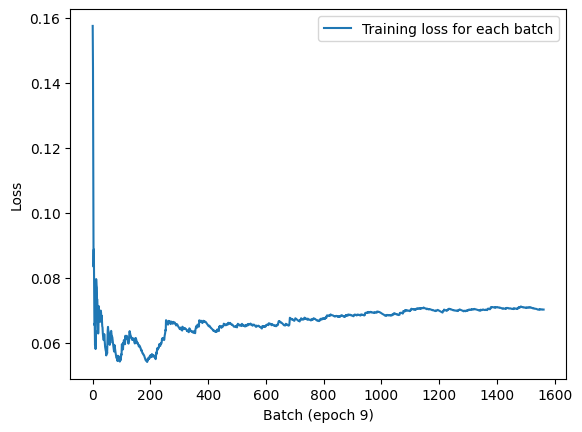

In [64]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드 활용하기  

- 훈련하는 동안 모델 안에서 일어나는 모든 것을 모니터링!
- 활성화 출력과 그레디언트의 히스토그램 그릴 때
- 임베딩을 3D로 표현할 때

In [112]:
import tensorflow as tf
import datetime

log_dir = "/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  #주의 : 절대경로



In [113]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
tensorboard = TensorBoard(log_dir=log_dir)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8631 - loss: 0.4622 - val_accuracy: 0.9577 - val_loss: 0.1461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9544 - loss: 0.1561 - val_accuracy: 0.9674 - val_loss: 0.1096
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9650 - loss: 0.1187 - val_accuracy: 0.9719 - val_loss: 0.0981
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1056 - val_accuracy: 0.9747 - val_loss: 0.0945
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9721 - loss: 0.0949 - val_accuracy: 0.9761 - val_loss: 0.0889
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9744 - loss: 0.0888 - val_accuracy: 0.9774 - val_loss: 0.0870
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9769 - loss: 0.0831 - val_accuracy: 0.9769 - val_loss: 0.0868
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9790 - loss: 0.0750 - 

# **마지막: 사용자 정의 훈련, 루프 만들기**

In [116]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:  #자동 미분 수행
        predictions = model(inputs, training = True) # 이건 훈련 모드로, 드롭아웃이나 배치 정규화같은 훈련 전용 레이어가 동작하도록 한다. 
        loss = loss_fn(targets, predictions) # 예측값과 실제값 간의 손실 계산 
    gradients = tape.gradients(loss, model.trainable_weights) # 손실에 대한 모델 가중치의 기울기 계산하기. 
    optimizer.apply_gradients(zip(model.trainable_weights, gradients)) # 각 가중치와 그에 대한 기울기를 짝짓기 => 가중치 업뎃 

In [118]:
import tensorflow as tf
from tensorflow import keras

# 메트릭 정의
metric = keras.metrics.SparseCategoricalAccuracy()

# 타겟과 예측값을 텐서로 변환
targets = tf.constant([0, 1, 2])
predictions = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# 메트릭 업데이트 및 결과 계산
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")


결과: 1.00


In [123]:
values = tf.constant([0, 1, 2, 3, 4])
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
    #mean_tracker.reset_state()  #이거 하면 내부 상태 초기화되어서 평균 지표 0으로 나옴
    
print(f"평균 지표: {mean_tracker.result():.2f}")


평균 지표: 2.00


In [124]:
moodel = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()] #모니터링할 지표 리스트
loss_tracking_metric= keras.metrics.Mean() #손실 평균 추적

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training = True)
        loss = loss_fn(targets, predictions) 
    
    gradients = tape.gradient(loss, model.trainable_weights) 
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) # 역방향 패스 실행
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
        
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs

c:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [126]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")  

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9814
...loss: 0.0671
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9836
...loss: 0.0599
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9834
...loss: 0.0583


In [128]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9804
...val_loss: 0.0843


문제가 있다. 이렇게 직접 구현한다면 케라스 내장 함수인 fit()보다 더 오래 걸린다. 왜냐면 텐서플로는 earlr execution이기 때문이다.  
  
그래서 텐서플로 코드는 계산 그래프로 컴파일 하는 게 좋다. **@tf.function** 을 추가하자.

In [127]:
@tf.function  #이 코드만 추가됨
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")  #개빨라짐

평가 결과:
...val_sparse_categorical_accuracy: 0.9804
...val_loss: 0.0843


버그 추적에는 **즉시 실행 모드**, 코드가 제대로 작동하고, 성능을 높이고 싶을 때 **@tf.function** 데코레이터

fit()이 사용할 사용자 정의 훈련 스텝 구현하기

In [129]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):  #오버라이드 해오기
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [136]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 입력 데이터를 (28, 28)에서 (28*28,)으로 재구성
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

In [137]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs = inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4224
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1582
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1235
